<a href="https://colab.research.google.com/github/mkg6573/Linear-Regression-from-scratch/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports
This cell imports the necessary libraries: `numpy` for numerical operations, `pandas` for data manipulation, and `matplotlib.pyplot` and `seaborn` for data visualization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data
This cell loads the dataset from a CSV file named `after_EDA_dataset.csv` into a pandas DataFrame called `df`.

In [ ]:
df = pd.read_csv(r"C:\Users\mohit\OneDrive\Desktop\DS\ML\L R\Datasets\after_EDA_dataset.csv")

### Display Head of DataFrame
This cell displays the first 5 rows of the DataFrame `df` to get a quick overview of its structure and content.

In [ ]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


### Visualize Relationship between Processor Speed and Price
This cell generates a scatter plot using `seaborn` to visualize the relationship between 'proccessor_speed' on the x-axis and 'price' on the y-axis.

<Axes: xlabel='proccessor_speed', ylabel='price'>

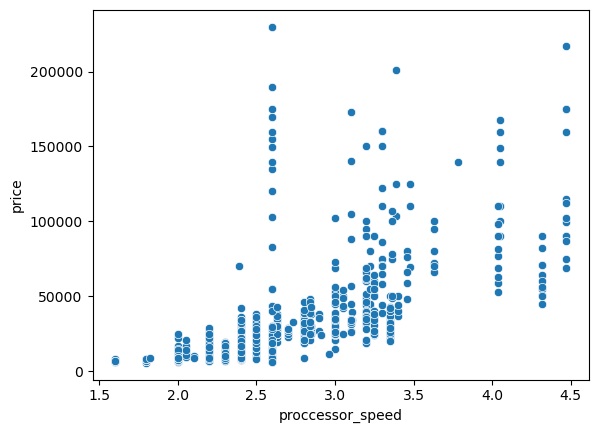

In [ ]:
sns.scatterplot(x=df['proccessor_speed'],y=df['price'])

In [ ]:
# predicting price based on proccessor_speed
X = df['proccessor_speed']
y = df['price']

### Simple Linear Regression Class
This cell defines a custom `SimpleLinearRegression` class from scratch. It includes methods for initialization (`__init__`), data scaling (`scale`), model fitting (`fit`) using gradient descent, and making predictions (`predict`). It uses a learning rate (`lr`) and number of epochs (`epochs`) for training.

In [ ]:
class SimpleLinearRegression:
    def __init__(self,lr=0.01,epochs=500):
        self.lr = lr
        self.epochs = epochs
        self.m = 0
        self.b = 0
        self.mean_ = None
        self.std_ = None

    def scale(self,X_train,flage = False):
        if flage:
            self.mean_ = X_train.mean()
            self.std_ = X_train.std()

        return (X_train-self.mean_)/self.std_


    def fit(self,X_train,y_train):
        x = self.scale(X_train,flage=True)
        x = np.array(x).reshape(-1)

        y = np.array(y_train).reshape(-1)
        n = len(X_train)

        for i in range(self.epochs):
            y_pred = self.m*x + self.b

            dm = (1/n) * np.dot(x,(y_pred - y))
            db = (1/n) * np.sum(y_pred - y)

            self.m -= self.lr*dm
            self.b -= self.lr*db

    def predict(self,X_test):
        x = np.array(X_test).reshape(-1)
        x = self.scale(x,flage=False)
        return self.m*x + self.b

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Split Data into Training and Testing Sets
This cell splits the `X` and `y` data into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) sets, with 20% of the data allocated for testing and a `random_state` of 42 for reproducibility.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
lr = SimpleLinearRegression()

In [ ]:
lr.fit(X_train,np.log1p(y_train))

In [ ]:
y_pred = lr.predict(X_test)

### Inverse Transform Predictions
Since `y_train` was log-transformed before fitting, this cell applies the inverse transformation (`np.expm1`) to `y_pred` to get the predictions back to their original scale.

In [ ]:
y_pred = np.expm1(y_pred)

### Evaluate Model Performance
This cell calculates and prints the R2 Score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) of the model's predictions (`y_pred`) against the actual test values (`y_test`). These metrics provide insights into the model's accuracy and performance.

In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.38694360086508695
MAE: 9324.920709030524
RMSE: 17917.85387011991
